# Используя данные о хоккеистах, проверьте, является ли среди хоккеистов из Финляндии, Норвегии и Дании значимым отличие роста. В качестве ответа запишите 1, если является, и 0 иначе.

(после решения будет представлен)
### Ответ: 0

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('hockey_players.csv', encoding='cp1251', parse_dates=['birth'])

Просмотрим первые строки датасета:

In [3]:
df.head()

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


Посмотрим количество строк, полей и информацию о полях в датасете:

In [4]:
df.shape

(6292, 13)

In [5]:
df.columns

Index(['year', 'country', 'no', 'name', 'position', 'side', 'height', 'weight',
       'birth', 'club', 'age', 'cohort', 'bmi'],
      dtype='object')

Удалим дубликаты:

In [6]:
df = df.drop_duplicates(['name', 'birth'])

In [7]:
df.shape

(3294, 13)

In [8]:
df['country'].unique()

array(['RUS', 'AUT', 'BLR', 'CAN', 'CZE', 'FIN', 'GER', 'ITA', 'JPN',
       'LAT', 'NOR', 'SUI', 'SVK', 'SWE', 'UKR', 'USA', 'POL', 'SLO',
       'DEN', 'FRA', 'KAZ', 'HUN'], dtype=object)

Построим распределение роста среди хоккеистов:

In [9]:
import matplotlib.pyplot as plt

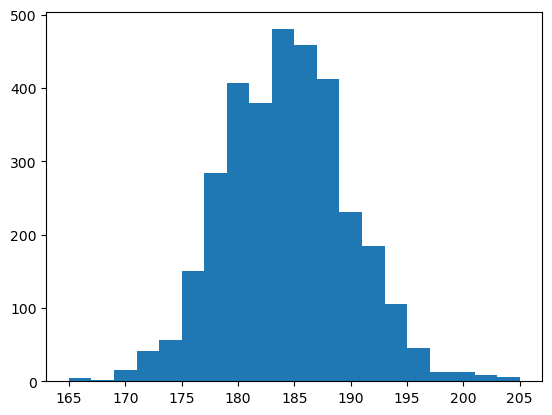

In [10]:
plt.hist(df['height'], bins=20)
plt.show()

Вывод: среди всех хоккеистов распределение роста близко к нормальному

In [11]:
fin = df[df['country'] == 'FIN']
nor = df[df['country'] == 'NOR']
den = df[df['country'] == 'DEN']

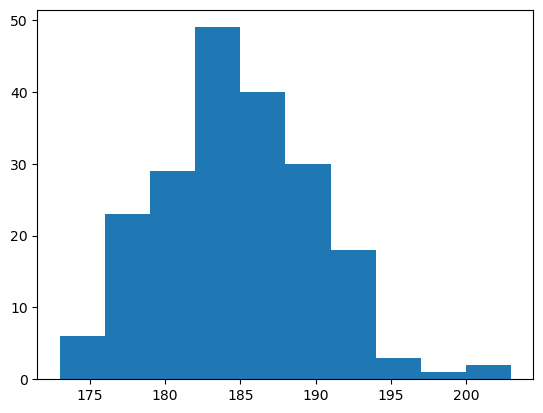

In [12]:
plt.hist(fin['height'])
plt.show()

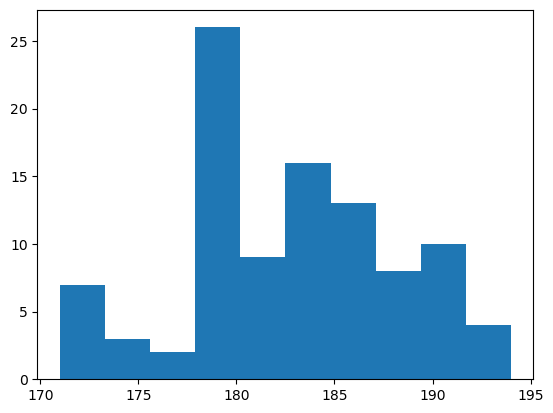

In [13]:
plt.hist(nor['height'])
plt.show()

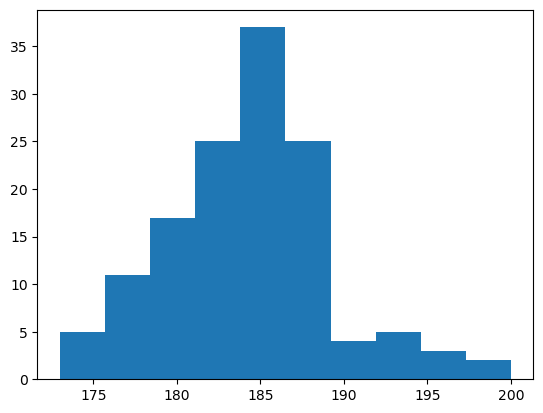

In [14]:
plt.hist(den['height'])
plt.show()

Вывод: во всех трех странах распределение роста близко к нормальному

Всего три группы:

In [15]:
k = 3
y1 = fin['height']
y2 = nor['height']
y3 = den['height']

Проведем однофакторный дисперсионный анализ. Сначала найдем средние зарплаты для каждой профессии:

In [16]:
y1_mean = np.mean(y1)
n1 = len(y1)
y1_mean, n1

(184.3233830845771, 201)

In [17]:
y2_mean = np.mean(y2)
n2 = len(y2)
y2_mean, n2

(182.72448979591837, 98)

In [18]:
y3_mean = np.mean(y3)
n3 = len(y3)
y3_mean, n3

(184.23880597014926, 134)

In [19]:
n = n1 + n2 + n3
n

433

Видно, что средний рост не сильно разнится. Установим, является ли отличие статистически значимо. Для этого сначала соберем все значения роста в один массив:

In [20]:
y_all = np.concatenate([y1, y2, y3])
y_all

array([184, 178, 178, 185, 192, 190, 191, 193, 183, 183, 184, 177, 177,
       178, 178, 181, 185, 181, 178, 184, 187, 179, 185, 175, 189, 184,
       186, 179, 185, 184, 188, 182, 181, 190, 187, 192, 189, 183, 182,
       191, 184, 179, 180, 183, 190, 199, 183, 183, 188, 176, 188, 178,
       186, 192, 185, 188, 178, 180, 192, 177, 183, 181, 178, 178, 181,
       188, 184, 184, 184, 183, 182, 185, 188, 183, 188, 178, 178, 191,
       185, 188, 184, 180, 189, 183, 185, 183, 178, 178, 185, 188, 177,
       189, 184, 182, 183, 179, 185, 185, 183, 189, 193, 193, 180, 185,
       185, 188, 190, 185, 185, 186, 184, 185, 183, 178, 182, 182, 182,
       191, 189, 183, 186, 185, 178, 191, 179, 187, 180, 183, 187, 186,
       186, 175, 181, 182, 180, 188, 178, 183, 186, 194, 178, 182, 175,
       178, 185, 193, 184, 188, 189, 188, 180, 185, 185, 189, 191, 175,
       196, 183, 190, 180, 173, 182, 185, 190, 181, 203, 181, 180, 179,
       184, 192, 186, 182, 185, 182, 184, 188, 186, 186, 180, 17

Найдем среднее значение роста по всем трем странам:

In [21]:
y_mean = np.mean(y_all)
print(y_mean)

183.9353348729792


Найдем $S^2$ — сумму квадратов отклонений наблюдений от общего среднего:

$$S^2 = \sum\limits_{i=1}^{k}\sum\limits_{j=1}^{n_i}({y}_{ij} - \overline{Y})^2$$

In [22]:
s2 = np.sum((y_all - y_mean)**2)
s2

11332.189376443417

Найдем $S^2_F$ - сумму квадратов отклонений средних групповых значений от общего среднего:

$$S_F^2 = \sum\limits_{i=1}^{k}(\overline{y}_i - \overline{Y})^2n_i$$

In [23]:
s2_f = ((y1_mean - y_mean)**2) * n1 + ((y2_mean - y_mean)**2) * n2 + ((y3_mean - y_mean)**2) * n3
s2_f

186.28984349590775

Найдем $S^2_{ост}$ — остаточную сумму квадратов отклонений:

$$S_{ост}^{2} = \sum\limits_{i=1}^{k}\sum\limits_{j=1}^{n_i}(y_{ij} - \overline{y}_i)^2$$

In [24]:
s2_residual = np.sum((y1 - y1_mean)**2) + np.sum((y2 - y2_mean)**2) + np.sum((y3 - y3_mean)**2)
s2_residual

11145.899532947507

Удостоверимся, что соблюдается равенство $S^2 = S_F^2 + S_{ост}^2$:

In [25]:
print(s2)
print(s2_f + s2_residual)

11332.189376443417
11332.189376443415


Найдем общую дисперсию:

$$\sigma_{общ}^{2} = \frac{S^2}{n - 1} = \frac{1}{n-1}\sum\limits_{i=1}^{k}\sum\limits_{j=1}^{n_i}(y_{ij} - \overline{Y})^2$$

In [26]:
sigma2_general = s2 / (n - 1)
sigma2_general

26.23191985287828

Найдем факторную дисперсию:

$$\sigma_{F}^{2} = \frac{S_{F}^{2}}{k-1} = \frac{1}{k-1}\sum\limits_{i=1}^{k}(\overline{y}_i - \overline{Y})^{2}n_i$$

In [27]:
sigma2_f = s2_f / (k - 1)
sigma2_f

93.14492174795387

Найдем остаточную дисперсию:

$$\sigma_{ост}^{2} = \frac{S_{ост}^{2}}{n - k} = \frac{1}{n - k}\sum\limits_{i=1}^{k}\sum\limits_{j=1}^{n_i}(y_{ij} - \overline{y}_i)^2$$

In [28]:
sigma2_residual = s2_residual / (n - k)
sigma2_residual

25.920696588250017



В дисперсионном анализе проверяется гипотеза $H_0$ о равенстве средних групповых значений количественного показателя:

$$(H_0: \overline{y}_1 = \overline{y}_2 = ... = \overline{y}_k).$$

Чтобы проверить эту гипотезу, необходимо воспользоваться соотношением:

$$F_H = \frac{\sigma_{F}^{2}}{\sigma_{ост}^{2}}$$

Вычислим $F_H$:

In [29]:
F_h = sigma2_f / sigma2_residual
F_h

3.59345750724064

Найдем значение $F_{крит}$ в таблице критических точек распределения Фишера-Снедекора для заданного уровня значимости $\alpha = 0.01$ и двух степеней свободы:

$df_{межд} = k - 1 = 3 - 1 = 2$ и $df_{внутр} = n - k = 433 - 3 = 430$.

Для данных значений $F_{крит} = 4.60$. 

Так как $F_H < F_{крит}$, различие средних роста в трех группах  не имеют статистически достоверного отличия.

Также вычислим эмпирическое корреляционное отношение $\eta^2$:

In [31]:
eta2 = s2_f / s2
eta2

0.01643899844130335

Принято считать, что при значениях $\eta^2$ ниже 0.2-0.3 групповые значения средних не имеют статистически достоверного отличия.

# Ответ: 0